***Consumption of fuel in mile per gallon based on data of city circle***
<br>======================================================<br>

**Domain** : Automobile <br>
**Context** : ' The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes '<br>

***1 Import the given data sets***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import DataFrame
import seaborn as sn
from scipy.stats import zscore

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

from sklearn.model_selection import train_test_split
from sklearn import metrics

***1.*** *1 Import all the given datasets and explore shape and size*

In [4]:
car_df = pd.read_json("Part1 - Car-Attributes.json")
carn_df = pd.read_csv("Part1 - Car name.csv")
print("Car data has {} records and {} attributes.".format(*car_df.shape))
print("Car name data has {} records and {} attributes.".format(*carn_df.shape))

Car data has 398 records and 8 attributes.
Car name data has 398 records and 1 attributes.


***1.*** *2 Merge all datasets onto one and explore final shape and size.*

In [5]:
car_df["name"] = carn_df

***1.*** *3. Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.*

In [6]:
car_df.to_excel("car_mpg_data.xlsx")
car_df.to_csv("car_mpg_data.csv")
car_df.to_json("car_mpg_data.json")

***1.*** *4. Import the data from above steps into python*

In [7]:
car_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


***2. Data cleansing***

***2.*** *1 Missing/incorrect value treatment*

In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
 8   name    398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


hp attribute is having non nueric data, which has to be corrected.

In [9]:
for val in car_df['hp']:
    if(not isinstance(val,int)):
        print(val);

?
?
?
?
?
?


6 values are having '?' in data, which has to be replace with numeric value like mean of the column.

In [10]:
hp = car_df['hp']
hp = np.where(hp=='?',0,hp)
car_df['hp'] = car_df['hp'].replace('?',round(hp.mean()))

***2.*** *2. Drop attribute/s if required using relevant functional knowledge*<br>
<br>
Name is not required for modeling

In [11]:
car_df = car_df.drop("name",axis=1)

***2.*** *3. Perform another kind of corrections/treatment on the data*

In [12]:
def plot_corr(df, size=24):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [13]:
car_df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.771762,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.839313,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.893996,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.771762,0.839313,0.893996,1.000000,0.860886,-0.684620,-0.411959,-0.453491
wt,-0.831741,0.896017,0.932824,0.860886,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.684620,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.411959,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453491,-0.581024,0.205873,0.180662,1.000000


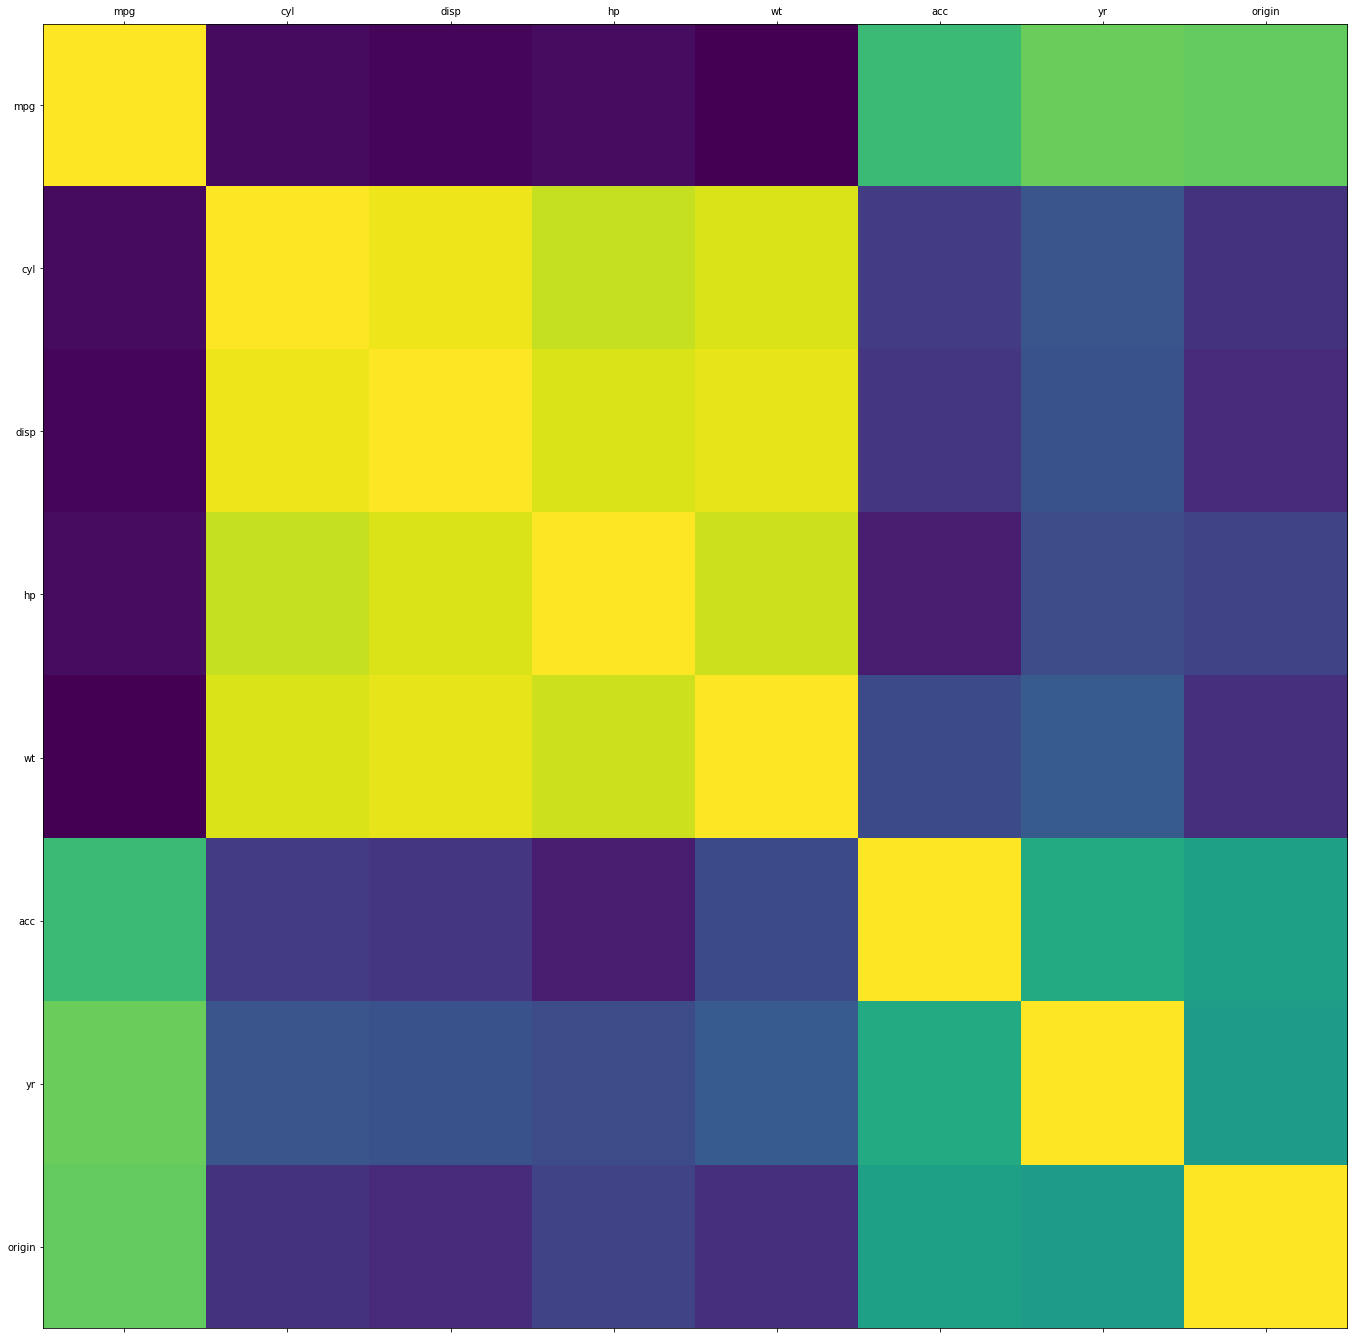

In [14]:
plot_corr(car_df)

In [15]:
cor_matrix = car_df.corr()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print("Following are the columns to be dropped as the correlation is going higher than 0.95")
print(to_drop)

Following are the columns to be dropped as the correlation is going higher than 0.95
['disp']


In [16]:
car_df = car_df.drop(to_drop,axis=1)

In [17]:
car_df[car_df.duplicated()]

,mpg,cyl,hp,wt,acc,yr,origin


*There are no duplicate records*

***3. Data analysis & visualisation***

***3.*** *1. Perform detailed statistical analysis on the data.*<br>
***3.*** *2. Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis*

In [18]:
car_df.describe()

,mpg,cyl,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,104.447236,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,38.199608,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [19]:
car_orig = car_df

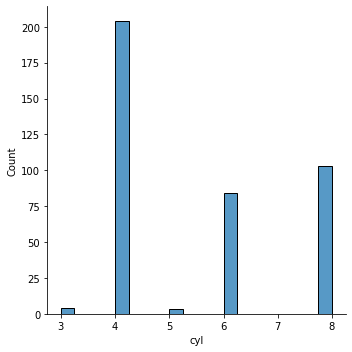

In [20]:
sn.displot(car_df['cyl'], bins = 20)

*Cylinders attribute data is discrit as given, majority of the cars having 4 cylindersand then 8.*

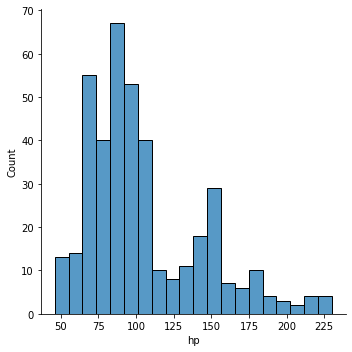

In [21]:
sn.displot(car_df['hp'], bins = 20)

*Horse power data is right skewed and majority of the cars having 90-100 hp.*

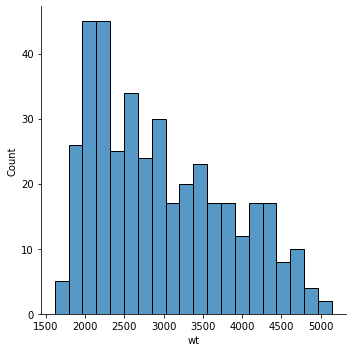

In [22]:
sn.displot(car_df['wt'], bins = 20)

*Weight of the cars is right skewed, means numer of the cars in the data are having weight between 2000 to 4000*

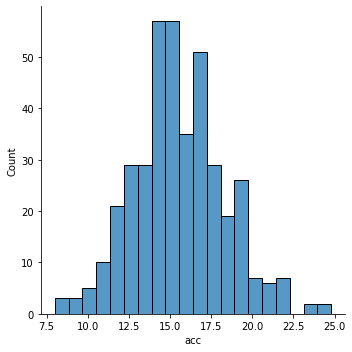

In [23]:
sn.displot(car_df['acc'], bins = 20)

 *Acceleration is symetrical, number of cars are less at lower and higher accelaration.*

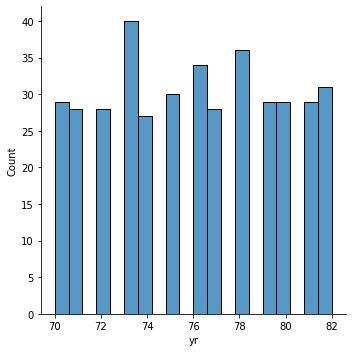

In [24]:
sn.displot(car_df['yr'], bins = 20)

*Number of car models released in every is same.*

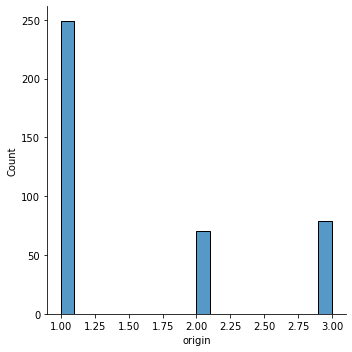

In [25]:
sn.displot(car_df['origin'], bins = 20)

*Number of cars in origin 1 having more cars.*

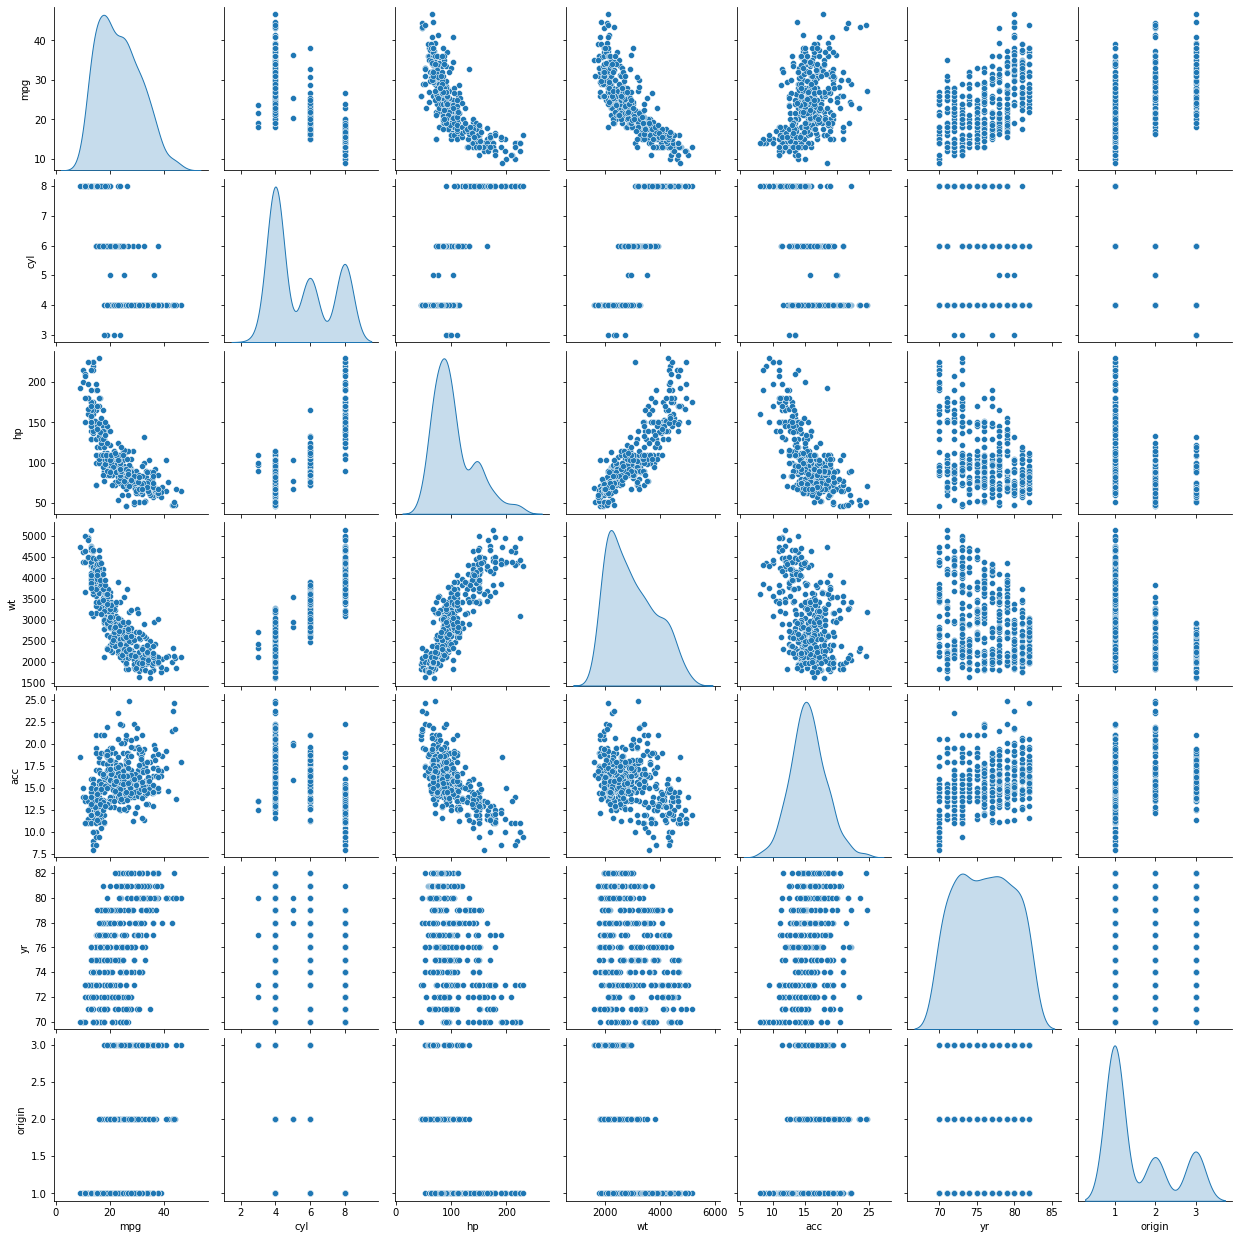

In [26]:
sn.pairplot(car_df,diag_kind="kde")

- *By looking into horsepower and weight, these 2 variables are having same impact on mpg and having linear relationship between 2*<br>
- *From each origin same number of cars are getting released in each year* <br>
- *acc, yr and origin can be dropped based on visuial analysis* <br>
-- *mpg can not be detremind based on clound nature of acc*<br>
-- *There is no bigh impact on mpg because of origin and yr change based on this data, so there columns can be dropped*

In [27]:
car_df = car_df.drop(['acc','origin','yr'],axis=1)

In [28]:
sup_col = car_df.drop('mpg',axis = 1)
trg_col = car_df['mpg']
sup_col_z = sup_col.apply(zscore)

***4. Machine learning***<br>
- ***4.*** *1 Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data*

- *Implementing K Means*

In [29]:
cluster_range = range( 2, 6 )   # expect 3 - 4 clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.297229e+07
1,3,3.332167e+07
2,4,1.832723e+07
3,5,1.316539e+07


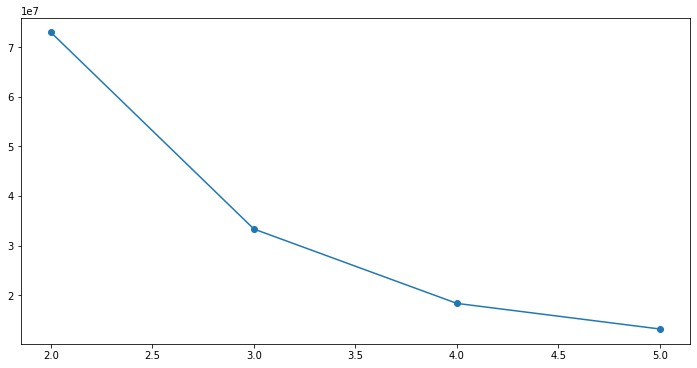

In [30]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

*Based on above elbow plot 3 to 4 cluster should be good for clustering*

- *Implementing Hierarchical clustering*

In [31]:
mpg_df_attr_hc = car_orig.loc[:, 'mpg':'origin']
mpg_df_attr_hc_z = mpg_df_attr_hc.apply(zscore)
cluster_range_h = range( 2, 6 )   
cluster_z = []
for num_clusters in cluster_range_h:
    clusters = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean',  linkage='average')
    clusters.fit(mpg_df_attr_hc_z)
    mpg_df_attr_hc_z['labels'] = clusters.labels_
    Z = linkage(mpg_df_attr_hc_z, metric='euclidean', method='average')
    c, coph_dists = cophenet(Z , pdist(mpg_df_attr_hc_z))
    cluster_z.append(c)
clusters_hdf = pd.DataFrame( { "num_clusters":cluster_range_h, "cluster_coph": cluster_z } )
clusters_hdf[0:15]

,num_clusters,cluster_coph
0,2,0.754135
1,3,0.756909
2,4,0.844716
3,5,0.824349


*Based on above analysis using hierarchical clustering 4-5 clusters are good to start with.*

*Examine Agglomerative Hierarchical Clustering Dendogram*

In [32]:
mpg_df_attr_hc = car_orig.loc[:, 'mpg':'origin']
mpg_df_attr_hc_f = mpg_df_attr_hc.apply(zscore)
clusters_h = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')
clusters_h.fit(mpg_df_attr_hc_z)
mpg_df_attr_hc_f['labels'] = clusters_h.labels_
Z_h = linkage(mpg_df_attr_hc_f, metric='euclidean', method='average')
c_h, coph_dists = cophenet(Z , pdist(mpg_df_attr_hc_f))
c_h

0.7575362864757054

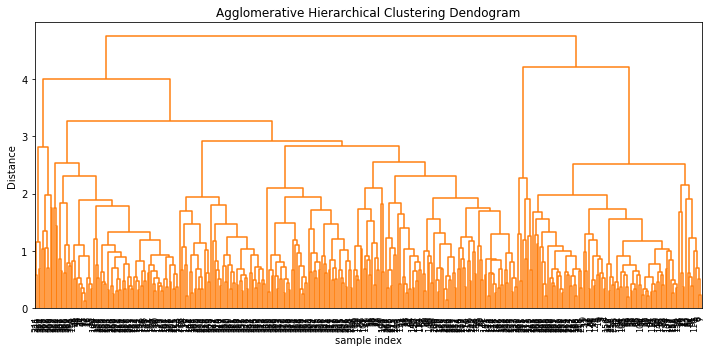

In [33]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_h, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

***5. Answer below questions based on outcomes of using ML based methods.***

***5.*** *1.Mention how many optimal clusters are present in the data and what could be the possible reason behind it.*<br>
To check the best cluster, we have check the box plot with 3 and 4 clusters

**Kmean with 3 clusters**

In [34]:
car_orig.head(5)

,mpg,cyl,hp,wt,acc,yr,origin
0,18.0,8,130,3504,12.0,70,1
1,15.0,8,165,3693,11.5,70,1
2,18.0,8,150,3436,11.0,70,1
3,16.0,8,150,3433,12.0,70,1
4,17.0,8,140,3449,10.5,70,1


In [35]:
mpg_df_attr = car_orig.loc[:, 'mpg':'yr']
mpg_df_attr_z = mpg_df_attr.apply(zscore)

cluster = KMeans( n_clusters = 3, random_state = 4 )
cluster.fit(mpg_df_attr_z)

prediction=cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

In [36]:
centroids = cluster.cluster_centers_
centroids

array([[-1.13798088,  1.48629978,  1.47993457,  1.370074  , -1.05087852,
        -0.62634553],
       [-0.20879244, -0.24345499, -0.27244724, -0.16616937,  0.29008855,
        -0.3372195 ],
       [ 1.14848699, -0.81981651, -0.77672474, -0.83246925,  0.42420093,
         0.92508158]])

*Examin the groups to check any outliears exists in the group affecting the centroid using boxplot for each group*

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

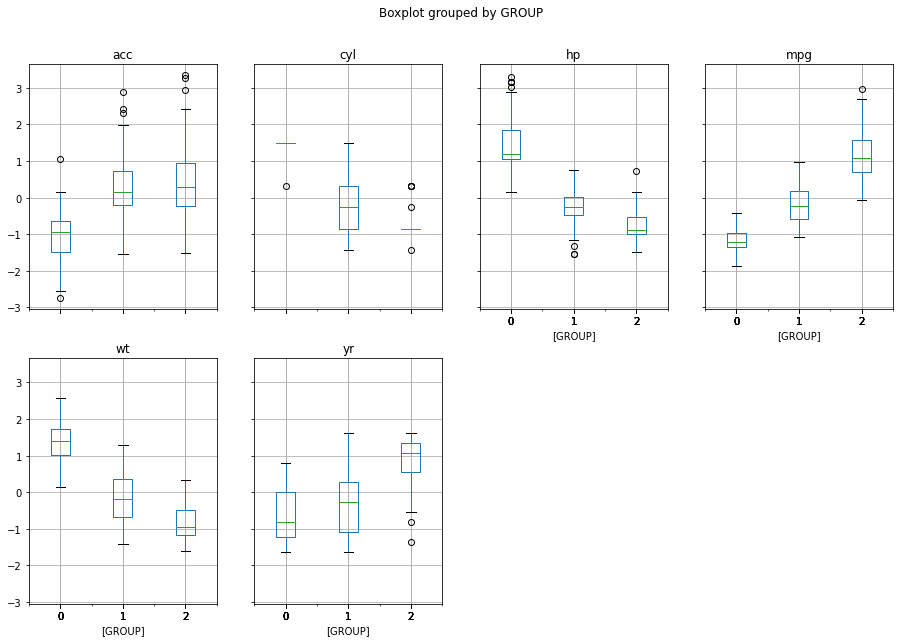

In [37]:
mpg_df_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

*Based on above box plot acc, cyl, hp and wt are having outliers, will check the same with K = 4* 

In [38]:
mpg_df_attr = car_orig.loc[:, 'mpg':'yr']
mpg_df_attr_z_c4 = mpg_df_attr.apply(zscore)

cluster = KMeans( n_clusters = 4, random_state = 4 )
cluster.fit(mpg_df_attr_z_c4)

prediction=cluster.predict(mpg_df_attr_z_c4)
mpg_df_attr_z_c4["GROUP"] = prediction  
centroids = cluster.cluster_centers_
centroids

array([[ 0.18666598, -0.80280894, -0.54653757, -0.76752113,  0.25583876,
        -0.72754768],
       [-1.15938738,  1.48579909,  1.51956495,  1.39522443, -1.08300164,
        -0.67540626],
       [-0.49564943,  0.38782488, -0.0507416 ,  0.36701897,  0.35981135,
         0.11420807],
       [ 1.16619845, -0.8258743 , -0.73953612, -0.7660293 ,  0.39563552,
         1.08741815]])

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

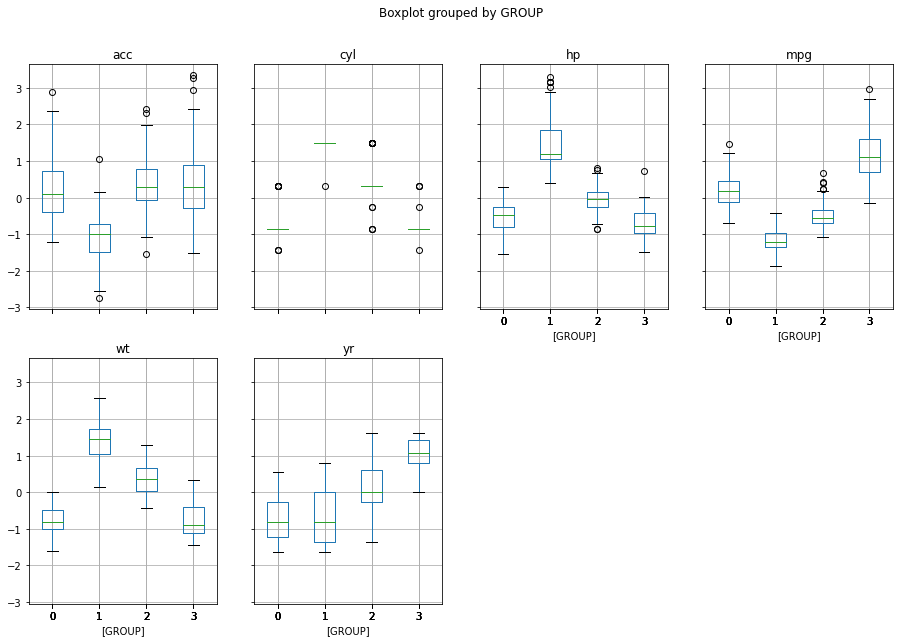

In [39]:
mpg_df_attr_z_c4.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

***The number of outlinears are high for K=4, so 3 clusters are optimal for this data set*** 

***5.*** *2.Use linear regression model on diﬀerent clusters separately and print the coefficients of the models individually*

In [40]:
groups = mpg_df_attr_z.groupby("GROUP")

In [41]:
group_0 = groups.get_group(0)

In [42]:
group_1 = groups.get_group(1)

In [43]:
group_2 = groups.get_group(2)

In [44]:
groups.apply(pd.Series.tolist).tolist()[2]

[[1.471328862955975,
  -0.8563205709794179,
  -0.9291156058224753,
  -1.6049434405635041,
  0.8829750351682267,
  -1.3566421515734501,
  2.0],
 [0.7027050169770487,
  -0.8563205709794179,
  -1.453340175027671,
  -1.3046279556657323,
  1.4275933800338445,
  -0.8150738704037085,
  2.0],
 [0.9589129656366908,
  -0.8563205709794179,
  -0.9815380627429949,
  -1.2064933680810273,
  1.2460539317453052,
  -0.5442897298188376,
  2.0],
 [1.087016939966512,
  -0.8563205709794179,
  -1.0339605196635144,
  -1.341280632956405,
  1.9722117248994624,
  -0.5442897298188376,
  2.0],
 [0.9589129656366908,
  -0.8563205709794179,
  -1.374706489646892,
  -1.5623790411291743,
  0.3383566903026089,
  -0.5442897298188376,
  2.0],
 [1.087016939966512,
  -0.8563205709794179,
  -1.1388054335045537,
  -1.1438291133582639,
  1.2460539317453052,
  -0.5442897298188376,
  2.0],
 [0.9589129656366908,
  -0.8563205709794179,
  -0.9815380627429949,
  -1.147376146644458,
  0.1568172420140696,
  -0.5442897298188376,
  2.0],

In [45]:
group_data = [group_0,group_1,group_2]

In [46]:
group_data

[          mpg       cyl        hp        wt       acc        yr  GROUP
 0   -0.706439  1.498191  0.669769  0.630870 -1.295498 -1.627426      0
 1   -1.090751  1.498191  1.587162  0.854333 -1.477038 -1.627426      0
 2   -0.706439  1.498191  1.193994  0.550470 -1.658577 -1.627426      0
 3   -0.962647  1.498191  1.193994  0.546923 -1.295498 -1.627426      0
 4   -0.834543  1.498191  0.931882  0.565841 -1.840117 -1.627426      0
 ..        ...       ...       ...       ...       ...       ...    ...
 288 -0.680818  1.498191  0.800825  1.016314 -0.133646  0.809631      0
 289 -0.847353  1.498191  1.325050  1.642957 -0.242570  0.809631      0
 290 -1.026699  1.498191  0.984304  1.281159 -0.460417  0.809631      0
 291 -0.552714  1.498191  0.538713  0.750287 -0.206262  0.809631      0
 292 -0.642387  1.498191  1.193994  1.146372 -0.932419  0.809631      0
 
 [99 rows x 7 columns],
           mpg       cyl        hp        wt       acc        yr  GROUP
 14   0.062185 -0.856321 -0.247624 -0.

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
coef_array =[]
def group_linear_model(gdata):
    g0_Y = gdata['mpg']
    g0_X = gdata.drop(['mpg','GROUP'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(g0_X, g0_Y, test_size=0.20, random_state=1)
    lreg = LinearRegression()
    lreg.fit(X_train,y_train)
    coef_array.append(lreg.coef_)

In [49]:
for gd in group_data:
    group_linear_model(gd)

print(coef_array)

[array([ 0.34016554, -0.11475165, -0.16950531, -0.12815971,  0.17303537]), array([ 0.03923516, -0.13499975, -0.62851239, -0.00190633,  0.17483372]), array([ 0.49440845, -0.27316622, -0.93331856,  0.09563347,  0.44210763])]


## Part two of the project

**DOMAIN:** Manufacturing <br>
**CONTEXT:** Company X curates and packages wine across various vineyards spread throughout the country<br>

**PROJECT OBJECTIVE:** Goal is to build a synthetic data generation model using the existing data provided by the company

1. Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data

In [50]:
wine_data = pd.read_excel("Part2 - Company.xlsx")

In [51]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [52]:
quality_data_miss = wine_data[wine_data["Quality"].isna()]

In [53]:
wine_data_with_qul = wine_data[~wine_data["Quality"].isna()]

In [54]:
dic = {"Quality A":1,"Quality B":2}

In [55]:
wine_data_with_qul["Quality"].replace(to_replace=dic,inplace=True)

D:\Installed_Softwares\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [56]:
wine_quality_data = wine_data_with_qul["Quality"]

In [57]:
wine_data_with_qul = wine_data_with_qul.drop("Quality",axis=1)

In [58]:
wine_data_with_qscal = wine_data_with_qul.apply(zscore)

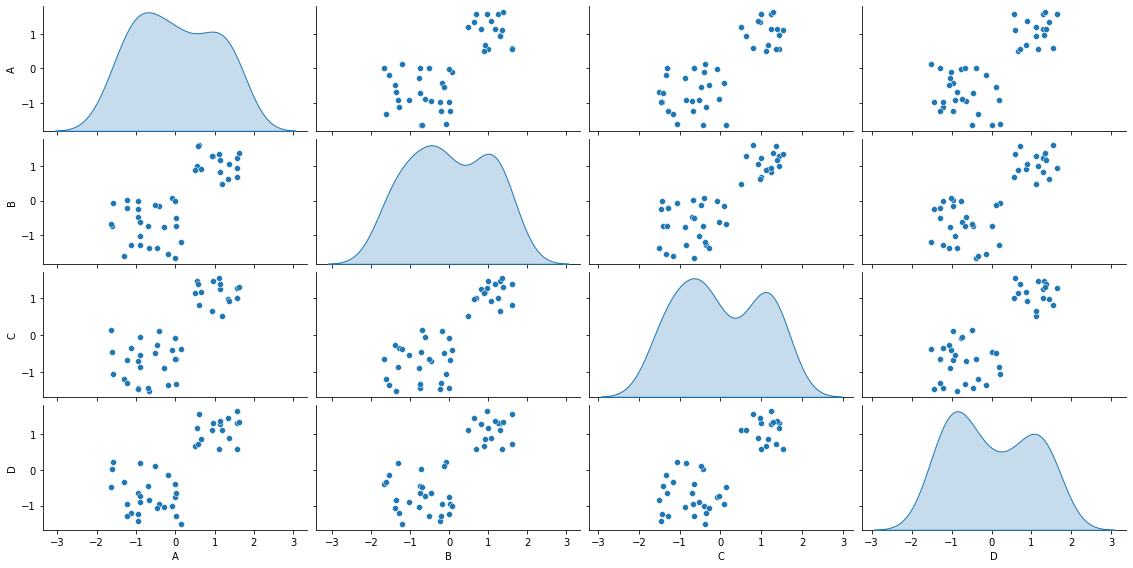

In [59]:
sn.pairplot(wine_data_with_qscal, height=2,aspect=2 , diag_kind='kde')

In [60]:
wmodel = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')

In [61]:
wmodel.fit(wine_data_with_qscal)

AgglomerativeClustering(linkage='average')

In [62]:
wine_data_with_qscal['labels'] = wmodel.labels_

In [63]:
quality_data_miss = quality_data_miss.drop("Quality",axis=1)

In [64]:
quality_data_miss_scale = quality_data_miss.apply(zscore)

In [65]:
wmodel.fit_predict(quality_data_miss_scale)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [66]:
quality_data_miss_scale['labels'] = wmodel.labels_

In [67]:
quality_data_miss_scale

,A,B,C,D,labels
2,0.000000,0.421989,-0.214062,-0.640709,1
5,-0.148482,-0.158421,0.148360,1.045803,1
7,0.791902,-0.057480,-0.061463,-0.070271,1
9,-0.346457,0.800517,0.224659,-0.392693,1
14,0.668168,-0.107951,-0.004239,0.425762,1
18,0.197976,0.623871,0.320033,0.847390,1
23,0.296963,0.977164,0.663380,0.648976,1
27,0.841396,0.573400,1.006727,-0.045470,1
29,-3.217104,-2.454826,-2.674713,-3.021667,0
32,0.049494,-0.208892,-0.061463,-0.442296,1


* Add 1 to the prediction to get the dic values.

In [68]:
quality_data_miss_scale['labels'] = quality_data_miss_scale['labels']+1

In [69]:
for i,row in quality_data_miss_scale.iterrows():
    if row[4] == 2:
        quality_data_miss_scale.at[i, 'Quality'] = 'Quality B'
    else:
        quality_data_miss_scale.at[i, 'Quality'] = 'Quality A'

In [70]:
wine_data['Quality1'] = quality_data_miss_scale['Quality']

In [71]:
def is_nan(x):
    return (x != x)

Update predicted values to original data set

In [72]:
for i,row in wine_data.iterrows():
    if is_nan(row[4]):
        wine_data.at[i, 'Quality'] = row[5]

In [73]:
wine_data["Quality"].value_counts()

Quality B    33
Quality A    28
Name: Quality, dtype: int64

## Part Three of the project

***DOMAIN:*** Automobile

***CONTEXT:*** The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. 
The vehicle may be viewed from one of many different angles

***PROJECT OBJECTIVE:*** Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the 
model using just the raw data.

 **Step 1 Data:** Import, clean and pre-process the data

In [74]:
veh_data = pd.read_csv("vehicle.csv")

In [75]:
veh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [76]:
veh_data["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [77]:
veh_dic = {"car":1,"bus":2,"van":3}

In [78]:
veh_data["class"].replace(to_replace = veh_dic,inplace=True)

* Identify NaN is the data and replace with mean of the column

In [79]:
veh_data[veh_data.isna().any(axis=1)].count()

compactness                    33
circularity                    28
distance_circularity           29
radius_ratio                   27
pr.axis_aspect_ratio           31
max.length_aspect_ratio        33
scatter_ratio                  32
elongatedness                  32
pr.axis_rectangularity         30
max.length_rectangularity      33
scaled_variance                30
scaled_variance.1              31
scaled_radius_of_gyration      31
scaled_radius_of_gyration.1    29
skewness_about                 27
skewness_about.1               32
skewness_about.2               32
hollows_ratio                  33
class                          33
dtype: int64

In [80]:
veh_data.fillna(veh_data.mean(),inplace = True)

In [81]:
veh_data[veh_data.isna().any(axis=1)].count()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

* Identify the correlation between columns

In [82]:
def plot_corr(df, size=24):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

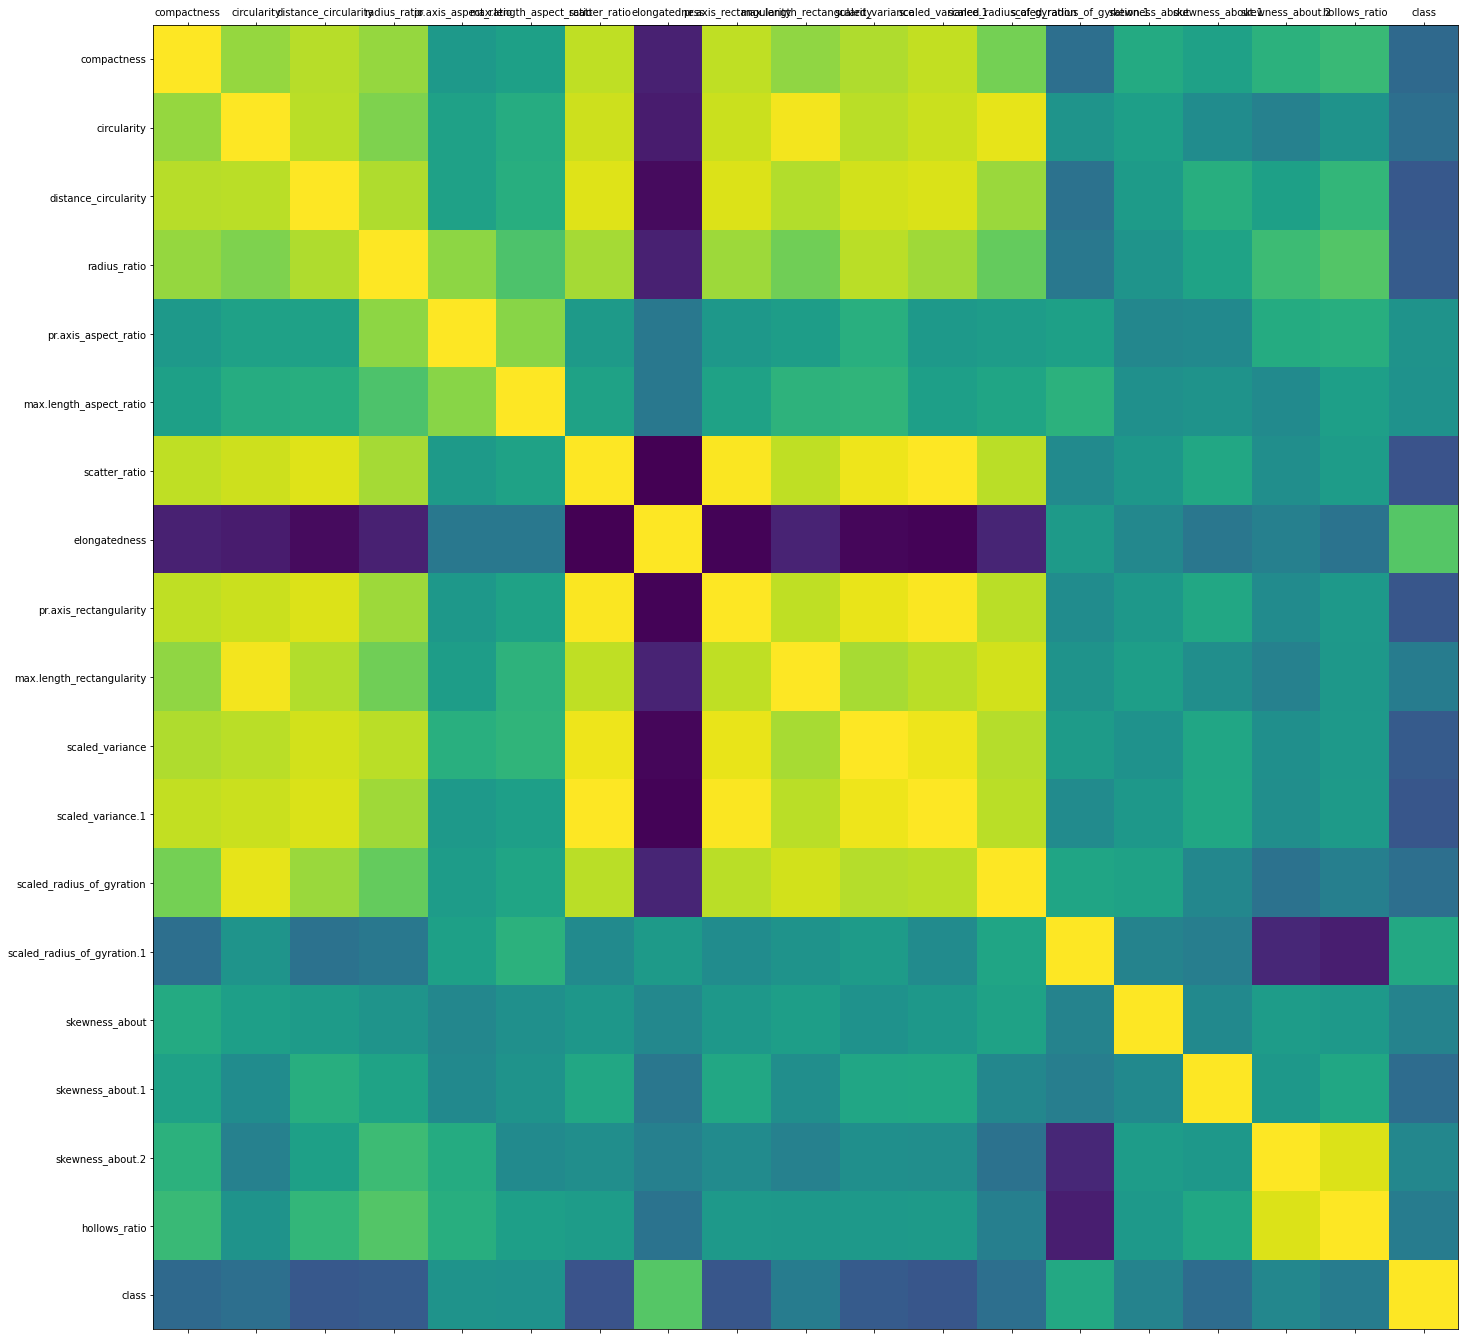

In [83]:
plot_corr(veh_data)

* Identify the columns having correlation higher than .90 and drop the columns to avoid these columns to participate in prediction. By avoiding these columns, additional comutation can be avoided.

In [84]:
cor_matrix = veh_data.corr()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if (any(upper_tri[column] > 0.75) or any(upper_tri[column] < -0.75))]
print("Following are the columns to be dropped as the correlation is going higher than 0.90")
print(to_drop)

Following are the columns to be dropped as the correlation is going higher than 0.90
['distance_circularity', 'radius_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'hollows_ratio']


* Dropping the above columns

In [85]:
veh_data_proc = veh_data.drop(to_drop, axis=1)

In [86]:
x_data = veh_data_proc.drop("class",axis=1)
y_data = veh_data_proc["class"]
x_data = x_data.apply(zscore)

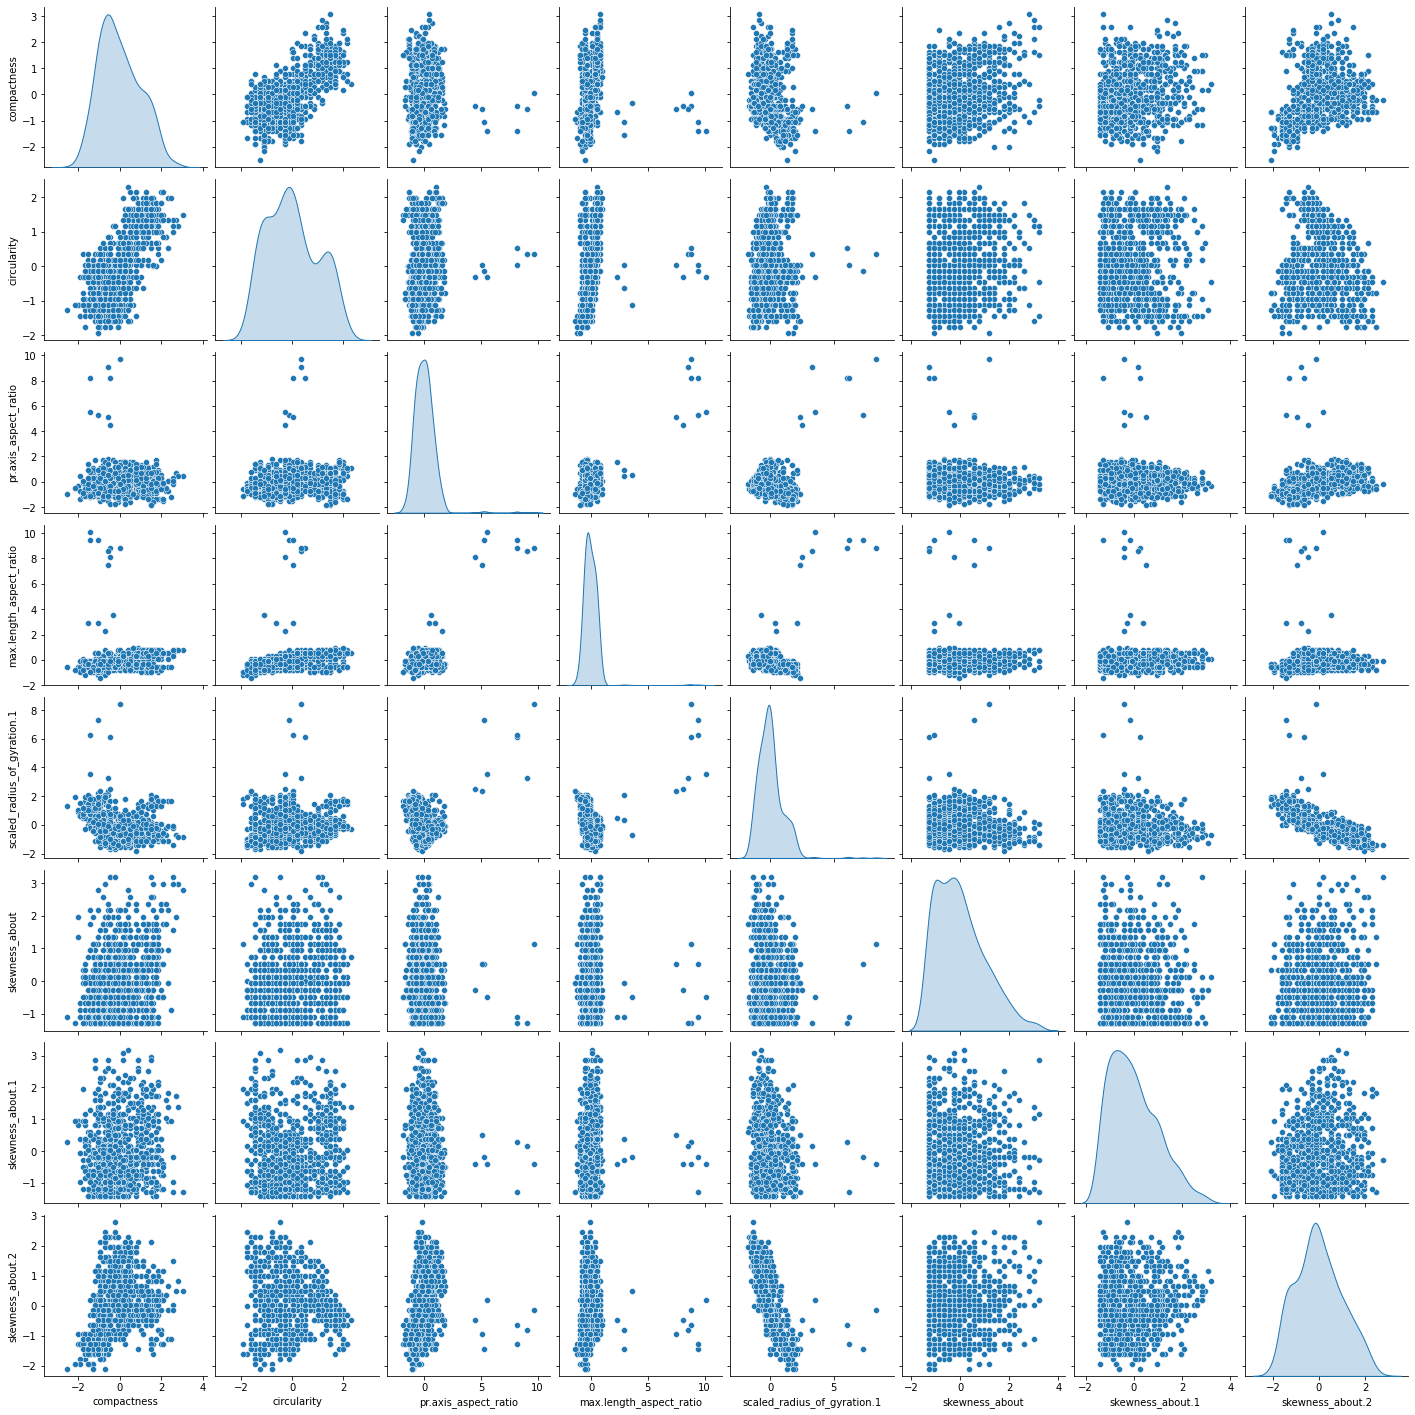

In [87]:
sn.pairplot(x_data,diag_kind="kde")

In [88]:
x_data.corr()

,compactness,circularity,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
compactness,1.000000,0.685421,0.091704,0.148249,-0.250071,0.235687,0.157387,0.298526
circularity,0.685421,1.000000,0.153362,0.251208,0.052642,0.144394,-0.011851,-0.105645
pr.axis_aspect_ratio,0.091704,0.153362,1.000000,0.648704,0.152776,-0.058481,-0.032134,0.239849
max.length_aspect_ratio,0.148249,0.251208,0.648704,1.000000,0.295574,0.015439,0.043489,-0.026180
scaled_radius_of_gyration.1,-0.250071,0.052642,0.152776,0.295574,1.000000,-0.088304,-0.126417,-0.749509
skewness_about,0.235687,0.144394,-0.058481,0.015439,-0.088304,1.000000,-0.035023,0.115145
skewness_about.1,0.157387,-0.011851,-0.032134,0.043489,-0.126417,-0.035023,1.000000,0.077428
skewness_about.2,0.298526,-0.105645,0.239849,-0.026180,-0.749509,0.115145,0.077428,1.000000


In [89]:
  X_vtrain, X_vtest, y_vtrain, y_vtest = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

In [90]:
from sklearn.svm import SVC

In [91]:
clf = SVC(kernel='linear')

In [92]:
clf.fit(X_vtrain,y_vtrain)

SVC(kernel='linear')

In [93]:
clf.coef_

array([[ 0.86311331, -0.70257511, -0.56552791,  1.16734683, -3.0241471 ,
         0.484147  ,  0.1616077 , -2.04490929],
       [ 0.75482308,  0.86686033,  0.00629144, -2.69999884, -2.01990264,
         0.00724656,  0.69259768, -1.33077896],
       [-0.85309835,  1.35275027,  0.81214511, -1.7387764 ,  1.84351057,
        -0.28542635,  0.19805889,  1.15092205]])

In [94]:
y_vpredict = clf.predict(X_vtest)


Confusion Matrix :


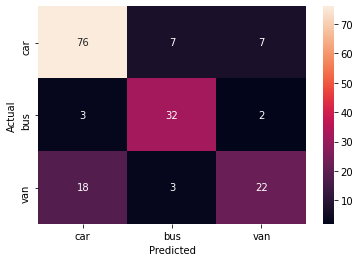

Classification Report :
              precision    recall  f1-score   support

         car       0.78      0.84      0.81        90
         bus       0.76      0.86      0.81        37
         van       0.71      0.51      0.59        43

    accuracy                           0.76       170
   macro avg       0.75      0.74      0.74       170
weighted avg       0.76      0.76      0.76       170



In [95]:
print("\nConfusion Matrix :")
label = ["car","bus","van"]
ax= plt.subplot()
sn.heatmap(metrics.confusion_matrix(y_vtest,y_vpredict),annot=True, ax = ax)
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual'); 
ax.xaxis.set_ticklabels(label); 
ax.yaxis.set_ticklabels(label);
plt.show()
print("Classification Report :")
print(metrics.classification_report(y_vtest,y_vpredict,target_names = label))

* Acuuracy of the model is .76, f1-score for van is less as the model is not able to perform van classification.

*  Perform dimensional reduction on the data.

In [96]:
from sklearn.decomposition import PCA

* Preprocess data:

In [97]:
X_veh_pca = veh_data.drop("class",axis=1)
Y_veh_pca = veh_data["class"]

In [98]:
X_veh_pca_scal = X_veh_pca.apply(zscore)

In [99]:
covMatrix = np.cov(X_veh_pca_scal,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18348087  0.07948

In [100]:
pca = PCA(n_components=18)
pca.fit(X_veh_pca_scal)

PCA(n_components=18)

In [101]:
print(pca.explained_variance_)

[9.40828822e+00 3.01605477e+00 1.90347881e+00 1.18027268e+00
 9.17174067e-01 5.39279825e-01 3.58566463e-01 2.21661730e-01
 1.60036194e-01 9.17140864e-02 6.65751851e-02 4.59556829e-02
 3.54023825e-02 2.67096104e-02 2.03690624e-02 1.74414127e-02
 9.23357029e-03 3.08801865e-03]


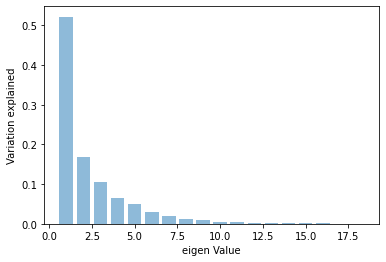

In [102]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

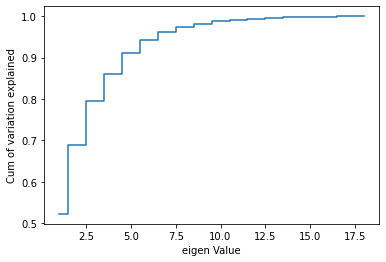

In [103]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

* Dimensionality Reduction<br>
Now 7 dimensions seems very reasonable. With 7 variables we can explain over 90% of the variation in the original data!

In [104]:
pca8 = PCA(n_components=7)
pca8.fit(X_veh_pca_scal)
print(pca8.components_)
print(pca8.explained_variance_ratio_)
Xpca8 = pca8.transform(X_veh_pca_scal)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

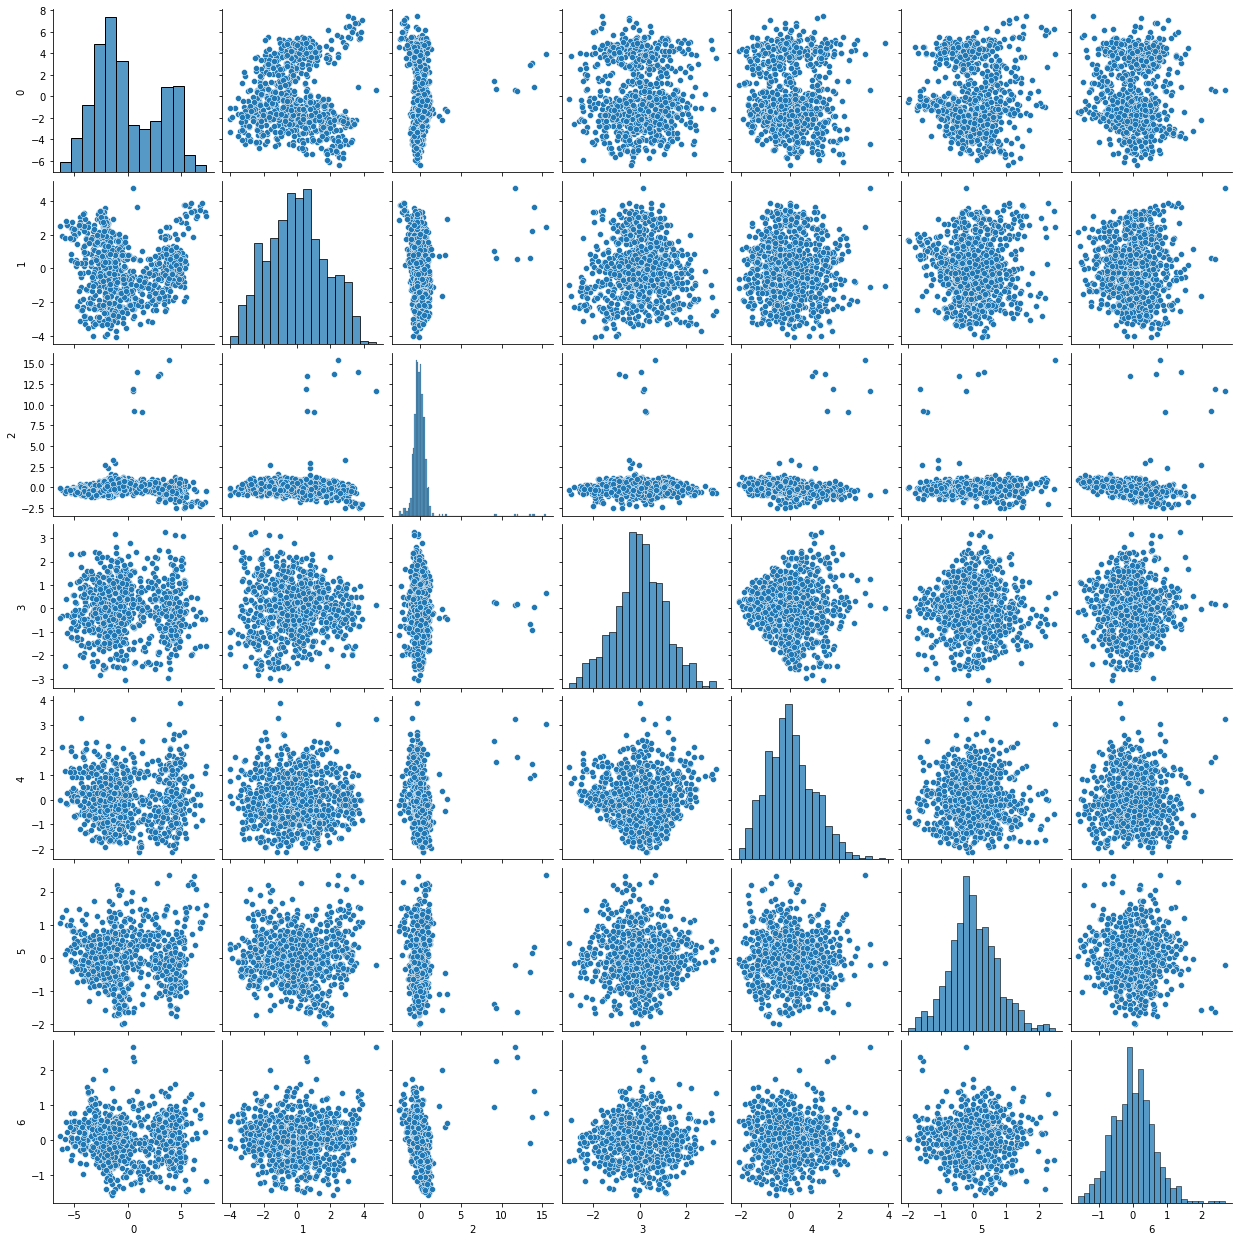

In [105]:
sn.pairplot(pd.DataFrame(Xpca8))

*  Design and train a best fit SVM classier using dimensionally reduced attributes

In [106]:
  X_vtrain_pca, X_vtest_pca, y_vtrain_pca, y_vtest_pca = train_test_split(X_veh_pca_scal, Y_veh_pca, test_size=0.20, random_state=1)

In [107]:
clf_pca = SVC(kernel='linear')

In [108]:
clf_pca.fit(X_vtrain_pca,y_vtrain_pca)

SVC(kernel='linear')

In [109]:
y_pridict_pca = clf_pca.predict(X_vtest_pca)


Confusion Matrix using PCA:


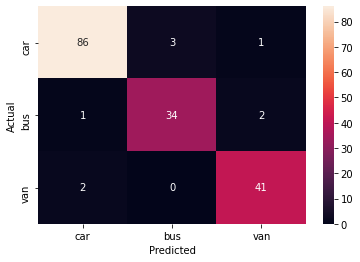

Classification Report using PCA:
              precision    recall  f1-score   support

         car       0.97      0.96      0.96        90
         bus       0.92      0.92      0.92        37
         van       0.93      0.95      0.94        43

    accuracy                           0.95       170
   macro avg       0.94      0.94      0.94       170
weighted avg       0.95      0.95      0.95       170



In [110]:
print("\nConfusion Matrix using PCA:")
label = ["car","bus","van"]
ax= plt.subplot()
sn.heatmap(metrics.confusion_matrix(y_vtest_pca,y_pridict_pca),annot=True, ax = ax)
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual'); 
ax.xaxis.set_ticklabels(label); 
ax.yaxis.set_ticklabels(label);
plt.show()
print("Classification Report using PCA:")
print(metrics.classification_report(y_vtest_pca,y_pridict_pca,target_names = label))

* Showcase key pointer on how dimensional reduction helped in this case<br>
Following are the points that are improved using PCA <br>
    1. f1-score for categories are increased above 90%<br>
    2. Accuracy of the module has increased to 95%

# Part four of the project

***DOMAIN:*** Sports management <br>
***CONTEXT:***  Company X is a sports management company for international cricket. <br>
***PROJECT OBJECTIVE:*** Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

In [2]:
cbm_data = pd.read_csv("batting_bowling_ipl_bat.csv")
cbm_data.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* pre-processing data:<br>
    1. Treat NaN values.<br>
    2. Remove duplicate if any.<br>
    3. Impute missing data<br>

In [3]:
cbm_data.drop_duplicates(inplace=True)

In [4]:
cbm_data.drop(cbm_data[cbm_data["Name"].isna()].index,inplace=True)

In [5]:
cbm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [6]:
cbm_data.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [7]:
cbm_data.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


* According to the above details given, Average runs in the player's list is 220<br>
* According to the data Ave is right skewed, means very less players are having more than average Ave.
* SR distribution also left skewed.
* maximum number of fours/sixes/HF hit/scored by players are less, as it is right skewed. 

Text(0.5, 0, 'HF')

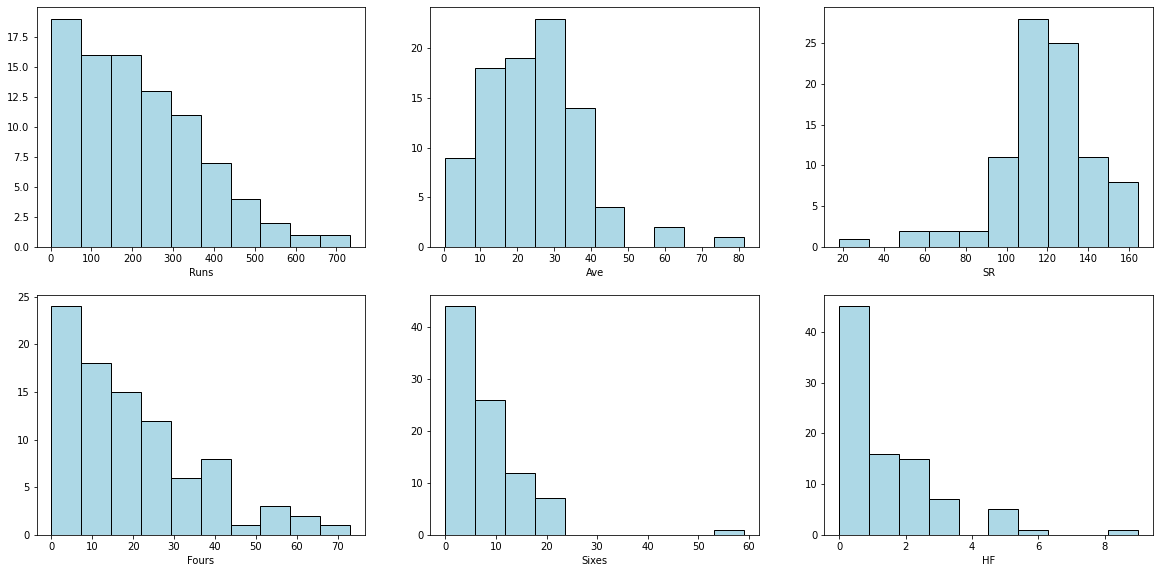

In [8]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(cbm_data.Runs, color='lightblue', edgecolor = 'black', alpha = 1)
plt.xlabel('Runs')

plt.subplot(3,3,2)
plt.hist(cbm_data.Ave, color='lightblue', edgecolor = 'black', alpha = 1)
plt.xlabel('Ave')

plt.subplot(3,3,3)
plt.hist(cbm_data.SR, color='lightblue', edgecolor = 'black', alpha = 1)
plt.xlabel('SR')

plt.subplot(3,3,4)
plt.hist(cbm_data.Fours, color='lightblue', edgecolor = 'black', alpha = 1)
plt.xlabel('Fours')

plt.subplot(3,3,5)
plt.hist(cbm_data.Sixes, color='lightblue', edgecolor = 'black', alpha = 1)
plt.xlabel('Sixes')

plt.subplot(3,3,6)
plt.hist(cbm_data.HF, color='lightblue', edgecolor = 'black', alpha = 1)
plt.xlabel('HF')

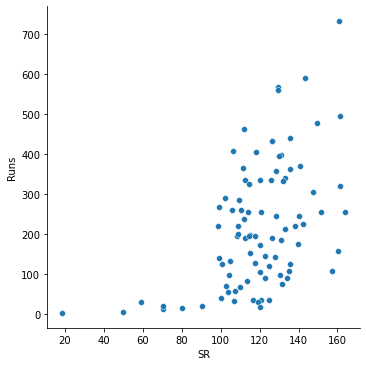

In [9]:
sn.relplot(x="SR", y="Runs", data=cbm_data);
# Players having more strick rate are having more runs, above 100 SR players are having more runs

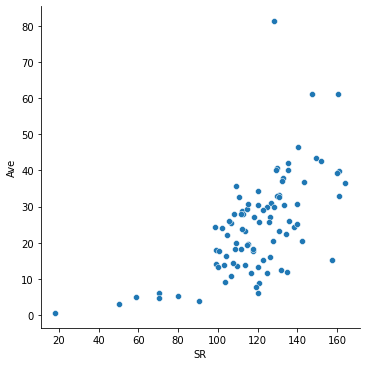

In [10]:
sn.relplot(x="SR", y="Ave", data=cbm_data);
# Ave of the players are good at SR above 100 as Runs. Most of the data lies between 10 - 45 as Ave in matches.

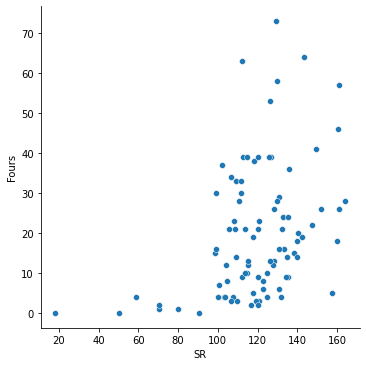

In [11]:
sn.relplot(x="SR", y="Fours", data=cbm_data);
# Fours of the players are good at SR above 100 as Runs,Ave. Most of the data lies between 0-40 fours.

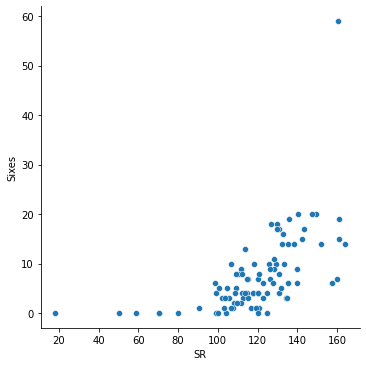

In [12]:
sn.relplot(x="SR", y="Sixes", data=cbm_data);
# Sixes of the players are good at SR above 100 as Runs,Ave,Fours. And most of the players are having sixes in range of 0-20 except 1 player

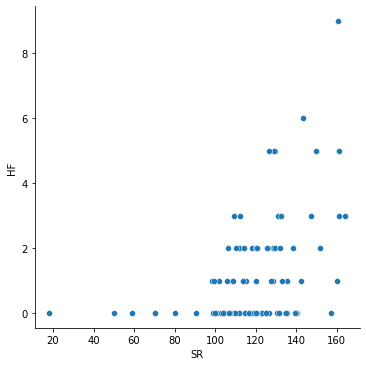

In [13]:
sn.relplot(x="SR", y="HF", data=cbm_data);
# HF of the players are good at SR above 100 as Runs,Ave,Fours. Even though SR is good above 100, Most of the playes did not achive HF.

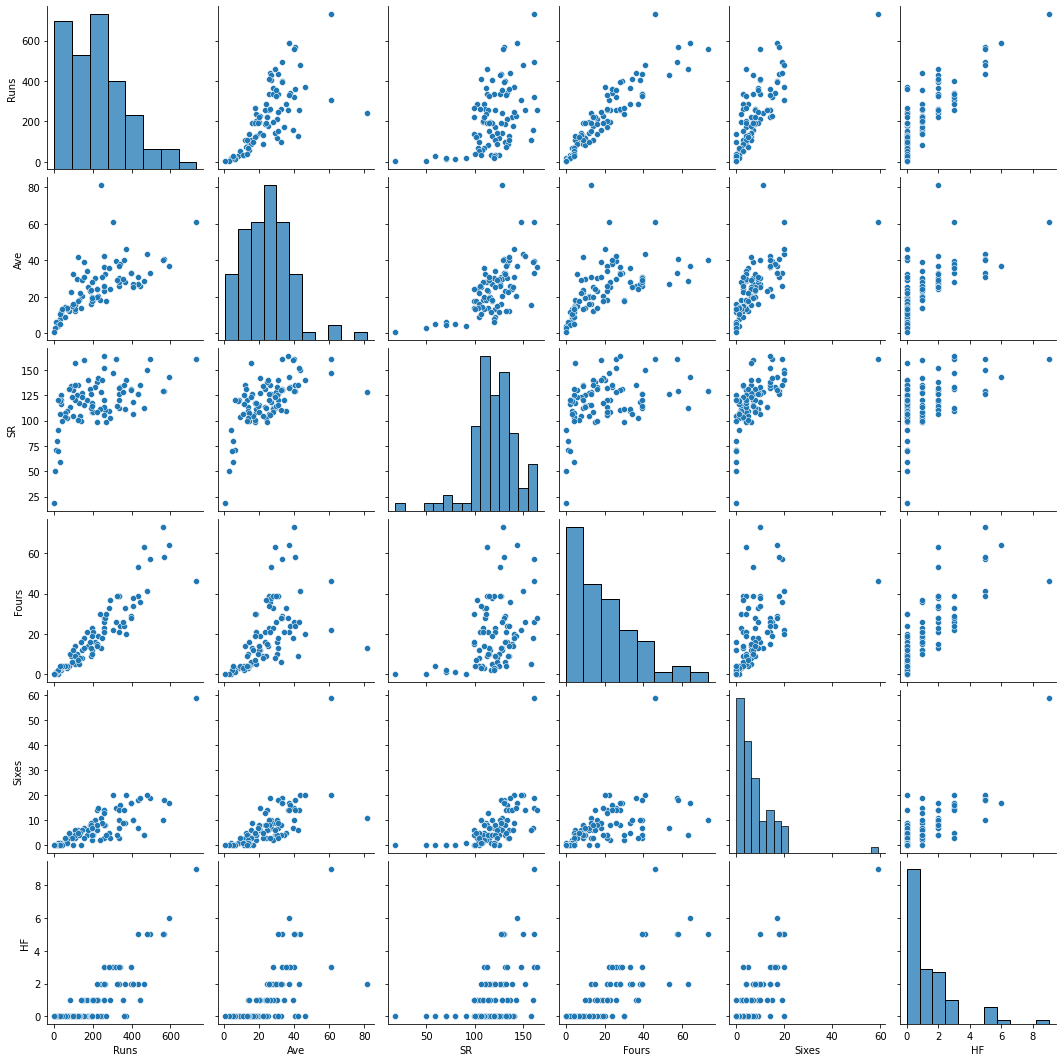

In [14]:
sn.pairplot(cbm_data)
# We can see the variance in all the attributes against each other in the below plot, following are the points infer from the plot.
# 1. With respect to Runs, most of the players does not hit four, six and does not have good ave. But SR is good.
# 2. With respect to Ave data follows same as with runs.

In [15]:
cbm_data.corr()

,Runs,Ave,SR,Fours,Sixes,HF
Runs,1.000000,0.692984,0.493489,0.918809,0.769778,0.835148
Ave,0.692984,1.000000,0.623606,0.546211,0.682414,0.620754
SR,0.493489,0.623606,1.000000,0.384810,0.583943,0.427584
Fours,0.918809,0.546211,0.384810,1.000000,0.522574,0.783689
Sixes,0.769778,0.682414,0.583943,0.522574,1.000000,0.767696
HF,0.835148,0.620754,0.427584,0.783689,0.767696,1.000000


In [22]:
# Applying zscore to delete unit of mesure, drop Name, Fours as correlation is above 90.
cbm_data_pro = cbm_data.drop(["Name","Fours"],axis=1)

In [17]:
cbm_data_pro.head()

,Runs,Ave,SR,Sixes,HF
1,733.0,61.08,160.74,59.0,9.0
3,590.0,36.87,143.55,17.0,6.0
5,495.0,33.00,161.23,19.0,5.0
7,479.0,43.54,149.68,20.0,5.0
9,569.0,40.64,129.61,18.0,5.0


In [23]:
cbm_data_pro = cbm_data_pro.apply(zscore)

In [41]:
#Ranking the players in every feature against with each player
cbm_data_rank = cbm_data_pro.rank(method='max')

In [64]:
# Getting the overall rating by number of features/sum of individual features
cbm_data_rank["Rating"]=  5/(cbm_data_rank["Runs"]+cbm_data_rank["Ave"]+cbm_data_rank["SR"]+cbm_data_rank["Sixes"]+cbm_data_rank["HF"])

In [67]:
# Raking again according to the new rating given for each player
cbm_data_rank["Rank"] = cbm_data_rank["Rating"].rank(method="max")

In [68]:
cbm_data["Rank"] = cbm_data_rank["Rank"]

In [72]:
# Top 10 ranked players in the list.
cbm_data.sort_values("Rank").head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Rank
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,2.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,3.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,4.0
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,6.0
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,7.0
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,8.0
21,DA Warner,256.0,36.57,164.10,28.0,14.0,3.0,9.0
27,OA Shah,340.0,37.77,132.81,24.0,16.0,3.0,10.0


# Part five of the project

1. List down all possible dimensionality reduction techniques that can be implemented using python<br><br>
Following are all possible dimensionality reduction techniques:<br><br>
    ***1.Missing Value Ratio :*** What if we have too many missing values (say more than 50%)? Should we impute the missing values or drop the variable? I would prefer to drop the variable since it will not have much information. However, this isn’t set in stone. We can set a threshold value and if the percentage of missing values in any variable is more than that threshold, we will drop the variable.<br> <br>
    ***2.Low Variance Filter :*** Consider a variable in our dataset where all the observations have the same value, say 1. If we use this variable, do you think it can improve the model we will build? The answer is no, because this variable will have zero variance.<br><br>
    ***3.High Correlation Filter :*** High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). We can calculate the correlation between independent numerical variables that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind).<br><br>
    ***4.Random Forest :*** Based on the feature importance graph using Random Forest (Scikit-Learn Implementation) , we can hand pick the top-most features to reduce the dimensionality in our dataset and discard other features.<br><br>
    5.Backward Feature Elimination<br>
    6.Forward Feature Selection<br>
    7.Factor Analysis<br><br>
    ***8.Principal Component Analysis :*** PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables.<br><br>
    9.Independent Component Analysis<br>
    10.Methods Based on Projections<br>
    11.t-Distributed Stochastic Neighbor Embedding (t-SNE)<br>
    12.UMAP<br>
    

2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and 
text data ? Please illustrate your findings using a simple implementation on python<br><br>
Dimensionality reduction techniques can be used on multimedia data also.<br><br>
Lets try implementing PCA on image data set

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [76]:
train_data.shape

(60000, 28, 28)

In [4]:
image = []
for i in range(0,60000):
    img = train_data[i].flatten()
    image.append(img)
image = np.array(image)

In [6]:
image.shape

(60000, 784)

In [7]:
feat_cols = [ 'pixel'+str(i) for i in range(image.shape[1]) ]

In [8]:
feat_cols

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 '

In [9]:
df = pd.DataFrame(image,columns=feat_cols)

<Figure size 432x288 with 0 Axes>

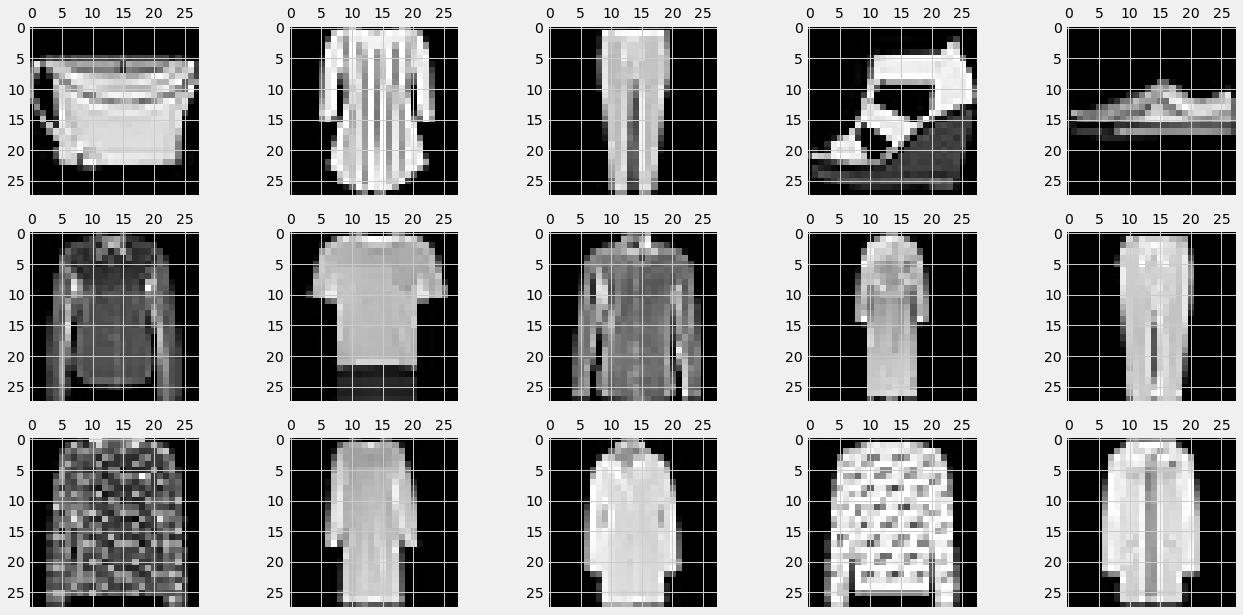

In [102]:
plt.gray()
fig = plt.figure(figsize=(20,10))
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))

In [103]:
#Let’s implement PCA using Python and transform the dataset:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df[feat_cols].values)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

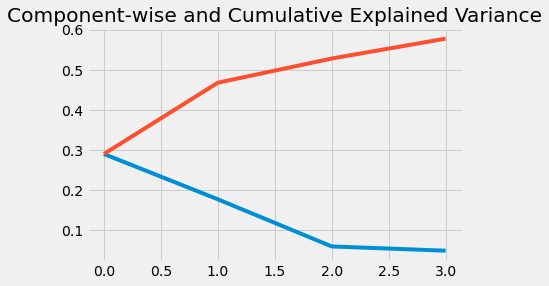

In [104]:
# Let’s visualize how much variance has been explained using these 4 components. We will use explained_variance_ratio_ to calculate the same.
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

* We are able to explain around 60% variance in the dataset using just four components

Text(0.5, 0.98, '4-Component PCA')

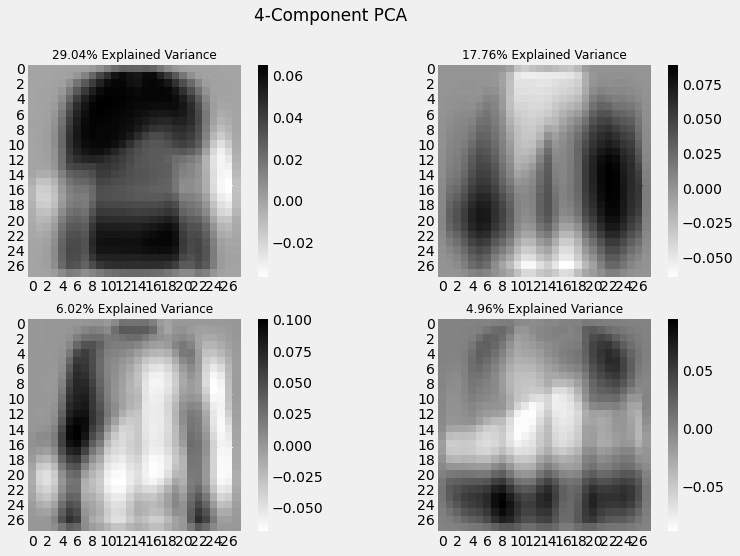

In [105]:
plt.style.use('fivethirtyeight')
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sn.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0][0], cmap='gray_r')
sn.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[0][1], cmap='gray_r')
sn.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[1][0], cmap='gray_r')
sn.heatmap(pca.components_[3, :].reshape(28, 28), ax=axarr[1][1], cmap='gray_r')
axarr[0][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
fontsize=12
)
axarr[0][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
fontsize=12
)
axarr[1][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
fontsize=12
)
axarr[1][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')

* Each additional dimension we add to the PCA technique captures less and less of the variance in the model. The first component is the most important one, followed by the second, then the third, and so on.